# 1. INTRODUCTION

The Coursework focuses on exploring the application of Convolutional Neural Networks (CNN) for Image Classification.

Convolutional neural networks (CNNs) are a form of neural network that excels at picture categorization and recognition. They are intended to handle data having a grid-like structure, such as photographs, and are especially good at finding patterns and features in images.

CNNs are made up of numerous layers of linked nodes, with each layer processing data in a unique way. The layers are widely divided into three types:

1. Convolutional layers perform a convolution operation to the input data, which entails sliding a kernel (also known as a filter) across the input and computing dot products between the kernel's entries and the input. This procedure assists the network in learning local patterns in the data.

2. Pooling layers: These layers degrade data spatial resolution by performing a pooling operation, which commonly entails taking the maximum or average value of a set of nearby pixels. This reduces the complexity of the data and makes the network more resistant to tiny changes in the input.

3. Layers that are completely connected: These layers connect every neuron in the previous layer to every neuron in the current layer.



To begin with the project, we will have to import all necessary modules. By standard, it is advisable to import the modules in a cell

In [ ]:
## MNIST classification using LeNet
'''
The MNIST database (Modified National Institute of Standards and Technology database[1]) 
is a large database of handwritten digits that is commonly used for training various image processing systems

The LeNet architecture is straightforward and small, 
(in terms of memory footprint), making it perfect for teaching the basics of CNNs — 
it can even run on the CPU (if your system does not have a suitable GPU), making it a great “first CNN”.
'''
# import the libraries
from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.framework import ops

In [ ]:
# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set

(train_digits, train_labels), (test_digits, test_labels) = load_data()
#  some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  
# we have grayscale images
# NOTE: image_height == image_width == 28
# re-shape the images data


train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes

# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

# split training set into training and validation
train_data2, val_data,train_labels_cat2,  val_labels = train_test_split(train_data, train_labels_cat, test_size=0.1)

## LeNet Algorithm
LeNet (or LeNet-5) is a convolutional neural network structure proposed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in 1989.

I. Architecture
LeNet consists of 2 parts:

The first part includes two convolutional layers and two pooling layers which are placed alternatively.
The second part consists of three fully connected layers.

The input is images of size 28 × 28

C1 is the first convolutional layer with 6 convolution kernels of size 5× 5.

S2 is the pooling layer that outputs 6 channels of 14 × 14 images. The pooling window size, in this case, is a square matrix of size 2 × 2.

C3 is a convolutional layer with 16 convolution kernels of size 5 × 5. Hence, the output of this layer is 16 feature images of size 10 × 10.

S4 is a pooling layer with a pooling window of size 2 × 2. Hence, the dimension of images through this layer is halved, it outputs 16 feature images of size 5 × 5.

C5 is the convolutional layer with 120 convolution kernels of size 5 × 5. Since the inputs of this layer have the same size as the kernel, then the output size of this layer is 1 × 1. The number of channels in output equals the channel number of kernels, which is 120. Hence the output of this layer is 120 feature images of size 1 × 1.

F6 is a fully connected layer with 84 neurons which are all connected to the output of C5.

The output layer consists of 10 neurons corresponding to the number of classes (numbers from 0 to 9).

In [ ]:
'''
The code is used to load the MNIST DATASET and print the shape of the training and test data.
The script first imports the mnist module from keras.datasets and then calls the load_data function to load the dataset.
The load_data function returns a tuple with the training and test data and labels, which are stored in the variables X_train, y_train, X_test, and y_test, respectively.
The script then prints the shape of the training and test data using the shape attribute of the numpy arrays. 
The shape of the data is a tuple with three elements: the number of samples, the height, and the width of the images.
 For example, if the shape of the training data is (60000, 28, 28), this means that the training data consists of 60000 images with a height of 28 pixels and a width of 28 pixels.
'''
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


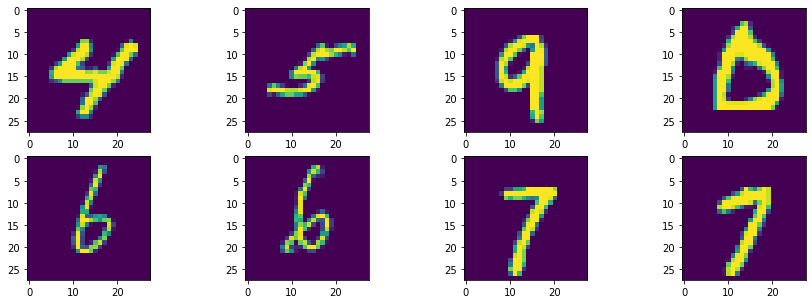

In [ ]:
'''
The code displays 8 random images from the dataset using matplotlib library to plot the images and the random module to select the images randomly.
The script first creates a figure with a specified size using the plt.figure function from matplotlib. 
It then iterates over a range of 8 using a for loop and selects a random index using the random.randint function. 
The plt.subplot function is used to create a subplot for each image, and the plt.imshow function is used to display the image.
This code can be used to visualize a dataset and get a sense of the type of images it contains
'''
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (15,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

The function 'preprocess_data' defined below is a Python function that preprocesses the input data for a machine learning model. The function takes four arguments: X_train, y_train, X_test, and y_test, which represent the training and test data and labels, respectively.

The function first reshapes the input data using the reshape function from numpy. This is necessary because the input data is expected to have a certain shape, depending on the model being used. In this case, the input data is reshaped to have four dimensions, with the first dimension representing the number of samples, the second and third dimensions representing the height and width of the input images, and the fourth dimension representing the number of channels.

The function then converts the data to the float32 data type using the astype function from numpy. This is necessary because many machine learning models expect the input data to be in this format.

The function then normalizes the data by dividing each element by 255.0. Normalizing the data can help improve the performance of the model by scaling the input features to a common range.

Finally, the function converts the labels to categorical format using the to_categorical function from keras.utils. This function converts a class vector (integers) to binary class matrix.

In [ ]:
# Data Preprocessing

from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

The function 'LeNet' defined below is a Python function that defines a convolutional neural network (CNN) model using the keras library. The model is based on the LeNet architecture.

The model is defined using the Sequential model from keras, which allows you to define a linear stack of layers. The model starts with two convolutional layers, each followed by a max pooling layer. The convolutional layers use the Conv2D function from keras and have a kernel size of (5,5), a padding of 'same', and a ReLU activation function. The max pooling layers use the MaxPooling2D function and have a pool size of (2,2).

After the convolutional and pooling layers, the model flattens the output using the Flatten function and adds two dense layers using the Dense function. The first dense layer has 120 units and uses a ReLU activation function, while the second dense layer has 10 units and uses a softmax activation function. This final layer is used for classification, with each unit representing a different class.

In [ ]:
## Build Lenet Model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
# metrics 
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD

def LeNet():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The first fully connected layer 
  model.add(Dense(120, activation = 'relu'))
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))
  
  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy, 
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 
    #to optimize the loss function
  # metric: accuracy 
  
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model
model = LeNet()

The function 'summary_history' defined below is a Python function that plots the training and validation accuracy of a machine learning model over time. The input to the function is a history object, which is a record of the training and validation accuracy during model training. 

The function first creates a new figure with a specified size using the plt.figure function from the matplotlib library. It then plots the training accuracy and validation accuracy using the plt.plot function, with the training accuracy plotted in blue and the validation accuracy plotted in red. The plt.legend function is used to add a legend to the plot, and the plt.title function is used to add a title to the plot. Finally, the plt.show function is used to display the plot.










Epoch 1/50
468/468 [==============================] - 10s 5ms/step - loss: 1.0887 - accuracy: 0.6826 - val_loss: 36.7868 - val_accuracy: 0.9098
Epoch 2/50
468/468 [==============================] - 2s 4ms/step - loss: 0.2769 - accuracy: 0.9182 - val_loss: 26.8750 - val_accuracy: 0.9381
Epoch 3/50
468/468 [==============================] - 2s 4ms/step - loss: 0.2003 - accuracy: 0.9404 - val_loss: 20.2319 - val_accuracy: 0.9546
Epoch 4/50
468/468 [==============================] - 2s 4ms/step - loss: 0.1628 - accuracy: 0.9513 - val_loss: 18.9170 - val_accuracy: 0.9599
Epoch 5/50
468/468 [==============================] - 2s 4ms/step - loss: 0.1391 - accuracy: 0.9590 - val_loss: 14.9481 - val_accuracy: 0.9642
Epoch 6/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1231 - accuracy: 0.9640 - val_loss: 14.1827 - val_accuracy: 0.9674
Epoch 7/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1108 - accuracy: 0.9676 - val_loss: 12.4335 - val_accuracy: 0.969

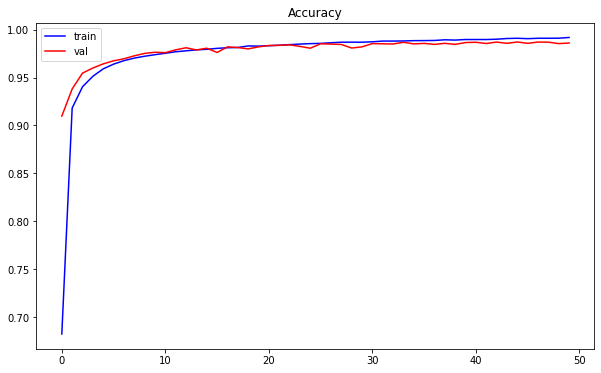

it took 144.1908473968506 to train the LeNet model


In [ ]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

# import the builtin time module
import time

# Grab Currrent Time Before Running the Code
start = time.time()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data


  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
 
 
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

# import the builtin time module
import time

# Grab Currrent Time Before Running the Code
start = time.time()

train_model(model,X_train, y_train, X_test, y_test)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print(f'it took {total_time} to train the LeNet model')

## Summary

Accuracy : 98.60

It took 144.19 sec to train the MNIST data using the LeNet architecture



In [ ]:
# Refrence
'''
Le Cun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989, January). Handwritten digit recognition with a back-propagation network. In Proceedings of the 2nd International Conference on Neural Information Processing Systems (pp. 396–404).
'''